**IMPORTATION DES PACKAGES**

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix , roc_auc_score
from tqdm import tqdm

**IMPORTATION DES DONNEES**

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split

DS = pd.read_csv(r"C:\Users\issad\Desktop\Base donnée mémoire 3\Memoire Final\Modèle_DAO\Bank_Bon23.csv", sep=';')

In [43]:
DS.head(5) 

,Age,Risque_du_secteur,freq_depots,freq_des_retraits,Lieux_de_residence,Type_de_client,M_depot,M_retrait,M_recu,M_envoye,Z_t_recu,Z_t_envoye,Blanchiment
0,31,0,19,13,1,1,393411,6884485,4565541,8507601,0,0,0
1,2,1,8,3,1,1,3289866,5865900,1583300,7041768,0,0,0
2,58,0,18,0,1,0,6197348,3103942,9434881,910070,0,1,0
3,24,0,13,26,0,0,5844268,1928525,4449115,6208713,0,0,0
4,41,0,7,1,0,0,879409,2367918,5351429,7804008,0,0,0


In [44]:
# les colonnes de caractéristiques (X) et la cible (y)

X = DS.drop('Blanchiment', axis=1)  # Toutes les colonnes sauf 'target'
y = DS['Blanchiment']  # La colonne cible

In [45]:
# Calculer la distribution des valeurs (en pourcentage)
taux = y.value_counts(normalize=True) * 100

# Afficher les résultats
print(taux)

Blanchiment
0    96.208
1     3.792
Name: proportion, dtype: float64


In [46]:
def safe_to_numeric(series):
    try:
        return pd.to_numeric(series)
    except Exception:
        return series  # laisser tel quel si erreur

X = X.apply(safe_to_numeric)
y = y.apply(safe_to_numeric)

In [47]:
X.head(5)

,Age,Risque_du_secteur,freq_depots,freq_des_retraits,Lieux_de_residence,Type_de_client,M_depot,M_retrait,M_recu,M_envoye,Z_t_recu,Z_t_envoye
0,31,0,19,13,1,1,393411,6884485,4565541,8507601,0,0
1,2,1,8,3,1,1,3289866,5865900,1583300,7041768,0,0
2,58,0,18,0,1,0,6197348,3103942,9434881,910070,0,1
3,24,0,13,26,0,0,5844268,1928525,4449115,6208713,0,0
4,41,0,7,1,0,0,879409,2367918,5351429,7804008,0,0


In [48]:
y .head(6)

0    0
1    0
2    0
3    0
4    0
5    0
Name: Blanchiment, dtype: int64

In [49]:
# La division les données en ensembles d'entraînement et de test (70% train, 30% test par défaut)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

# Vérifier les dimensions des sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(70000, 12) (30000, 12) (70000,) (30000,)


***Dans les données y_train nous avons 96,19 % de 0 soit non susceptible de Blanchir de l'argent et 3,81 % de 1 soit susceptible de Blanchir de l'argent***

In [50]:
import numpy as np

unique, counts = np.unique(y_train, return_counts=True)
total = len(y_train)

for value, count in zip(unique, counts):
    pourcentage = (count / total) * 100
    print(f"Valeur {value} : {pourcentage:.2f} %")


Valeur 0 : 96.22 %
Valeur 1 : 3.78 %


***Dans les données y_test nous avons 96,22 % de 0 soit non susceptible de Blanchir de l'argent et 3,78 % de 1 soit susceptible de Blanchir de l'argent***

In [51]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [52]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(70000, 12)
(70000,)
(30000, 12)
(30000,)


In [53]:
print(y_train.shape)
print(y_test.shape)

(70000,)
(30000,)


In [54]:
X_train = X_train.T
y_train = y_train.reshape((1, y_train.shape[0]))

In [55]:
print(X_train.shape)
print(y_train.shape)

(12, 70000)
(1, 70000)


In [56]:
X_test = X_test.T
y_test = y_test.reshape((1, y_test.shape[0]))

In [57]:
print(X_test.shape)
print(y_test.shape)

(12, 30000)
(1, 30000)


**Application du modèle a deux couches** 

# Fonctions

In [58]:
def initialisation(n0, n1, n2):

    W1 = np.random.randn(n1, n0)
    b1 = np.zeros((n1, 1))
    W2 = np.random.randn(n2, n1)
    b2 = np.zeros((n2, 1))

    parametres = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

    return parametres

In [59]:
def forward_propagation(X, parametres):

    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']

    Z1 = W1.dot(X) + b1
    A1 = 1 / (1 + np.exp(-Z1))
    #A1  = 1 / (1 + np.clip(-Z1, -750, 750))

    Z2 = W2.dot(A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))
    #A2= 1 / (1 + np.clip(-Z2, -750, 750))

    activations = {
        'A1': A1,
        'A2': A2
    }

    return activations

In [60]:
def back_propagation(X, y, parametres, activations):

    A1 = activations['A1']
    A2 = activations['A2']
    W2 = parametres['W2']

    m = y.shape[1]

    dZ2 = A2 - y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims = True)

    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims = True)

    gradients = {
        'dW1' : dW1,
        'db1' : db1,
        'dW2' : dW2,
        'db2' : db2
    }
    
    return gradients

In [61]:
def update(gradients, parametres, learning_rate):

    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']

    dW1 = gradients['dW1']
    db1 = gradients['db1']
    dW2 = gradients['dW2']
    db2 = gradients['db2']

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parametres = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

    return parametres

In [62]:
def predict(X, parametres):
    activations = forward_propagation(X, parametres)
    A2 = activations['A2']
    return A2 >= 0.5

In [63]:

def neural_network(X, y, n1=16, learning_rate = 0.1, n_iter = 1000):

    # initialisation parametres
    n0 = X.shape[0]
    n2 = y.shape[0]
    np.random.seed(0)
    parametres = initialisation(n0, n1, n2)

    train_loss = []
    train_acc = []
    history = []

    # gradient descent
    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X, parametres)
        A2 = activations['A2']

        # Plot courbe d'apprentissage
        train_loss.append(log_loss(y.flatten(), A2.flatten()))
        y_pred = predict(X, parametres)
        train_acc.append(accuracy_score(y.flatten(), y_pred.flatten()))
        
        history.append([parametres.copy(), train_loss, train_acc, i])
        
        # mise a jour
        gradients = back_propagation(X, y, parametres, activations)
        parametres = update(gradients, parametres, learning_rate)


    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='Perte d''entraînement')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='Précision d''entraînement')
    plt.legend()
    plt.show()

    return parametres

In [45]:
neural_network(X_train, y_train)

  0%|          | 0/1000 [00:00<?, ?it/s]C:\Users\issad\AppData\Local\Temp\ipykernel_4860\1750279114.py:9: RuntimeWarning: overflow encountered in exp
  A1 = 1 / (1 + np.exp(-Z1))
C:\Users\issad\AppData\Local\Temp\ipykernel_4860\1750279114.py:9: RuntimeWarning: overflow encountered in exp
  A1 = 1 / (1 + np.exp(-Z1))
  0%|          | 1/1000 [00:00<05:57,  2.79it/s]C:\Users\issad\AppData\Local\Temp\ipykernel_4860\1750279114.py:9: RuntimeWarning: overflow encountered in exp
  A1 = 1 / (1 + np.exp(-Z1))
C:\Users\issad\AppData\Local\Temp\ipykernel_4860\1750279114.py:9: RuntimeWarning: overflow encountered in exp
  A1 = 1 / (1 + np.exp(-Z1))
  0%|          | 2/1000 [00:00<05:46,  2.88it/s]C:\Users\issad\AppData\Local\Temp\ipykernel_4860\1750279114.py:9: RuntimeWarning: overflow encountered in exp
  A1 = 1 / (1 + np.exp(-Z1))
C:\Users\issad\AppData\Local\Temp\ipykernel_4860\1750279114.py:9: RuntimeWarning: overflow encountered in exp
  A1 = 1 / (1 + np.exp(-Z1))
  0%|          | 3/1000 [00:01

KeyboardInterrupt: 







**Deuxieme parties:Application avec plusieurs couches**

**1. Initialisation**

In [64]:
def initialisation(dimensions):
    
    parametres = {}
    C = len(dimensions)

    np.random.seed(1)

    for c in range(1, C):
        parametres['W' + str(c)] = np.random.randn(dimensions[c], dimensions[c - 1])
        parametres['b' + str(c)] = np.random.randn(dimensions[c], 1)

    return parametres

In [65]:
parametres =  initialisation ([12,12,12,1])
for key, val in parametres.items():
    print(key,val.shape)

W1 (12, 12)
b1 (12, 1)
W2 (12, 12)
b2 (12, 1)
W3 (1, 12)
b3 (1, 1)


**2. Forward Propagation**

In [66]:
def forward_propagation(X_test, parametres):
  
  activations = {'A0': X_test}

  C = len(parametres) // 2

  for c in range(1, C + 1):

    Z = parametres['W' + str(c)].dot(activations['A' + str(c - 1)]) + parametres['b' + str(c)]
    #activations['A' + str(c)] = 1 / (1 + np.exp(-Z))
    activations['A' + str(c)] = 1 / (1 + np.clip(-Z, -700, 700))
    
  return activations

In [67]:
activations = forward_propagation(X_test, parametres)
for key,val in activations.items():
    print(key,val.shape) 

A0 (12, 30000)
A1 (12, 30000)
A2 (12, 30000)
A3 (1, 30000)


**3. Back-Propagation**

In [68]:
def back_propagation(y_test, parametres, activations):

  m = y_test.shape[1]
  C = len(parametres) // 2

  dZ = activations['A' + str(C)] - y_test
  gradients = {}

  for c in reversed(range(1, C + 1)):
    gradients['dW' + str(c)] = 1/m * np.dot(dZ, activations['A' + str(c - 1)].T)
    gradients['db' + str(c)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
    if c > 1:
      dZ = np.dot(parametres['W' + str(c)].T, dZ) * activations['A' + str(c - 1)] * (1 - activations['A' + str(c - 1)])

  return gradients

In [69]:
grad = back_propagation(y_test, parametres, activations)
for key, val in grad.items():
    print(key,val.shape)

dW3 (1, 12)
db3 (1, 1)
dW2 (12, 12)
db2 (12, 1)
dW1 (12, 12)
db1 (12, 1)


**4. Mise à jour des paramètres**

In [70]:
def update(gradients, parametres, learning_rate):

    C = len(parametres) // 2

    for c in range(1, C + 1):
        parametres['W' + str(c)] = parametres['W' + str(c)] - learning_rate * gradients['dW' + str(c)]
        parametres['b' + str(c)] = parametres['b' + str(c)] - learning_rate * gradients['db' + str(c)]

    return parametres

In [71]:
def predict(X_train, parametres):
    activations = forward_propagation(X_train, parametres)
    C = len(parametres) // 2
    Af = activations['A' + str(C)]
    print(Af)
    return Af >= 0.5

In [110]:
def Apprentissage_profond_DAO(X_train, y_train, hidden_layers = (32, 32, 16), learning_rate = 0.02, n_iter = 700):
    
    # initialisation parametres
    dimensions = list(hidden_layers)
    dimensions.insert(0, X_train.shape[0])
    dimensions.append(y_train.shape[0])
    np.random.seed(1)
    parametres = initialisation(dimensions)

    # tableau numpy contenant les futures accuracy et log_loss
    training_history = np.zeros((int(n_iter), 2))

    C = len(parametres) // 2

    # gradient descent
    for i in tqdm(range(n_iter)):

        activations = forward_propagation(X_train, parametres)
        gradients = back_propagation(y_train, parametres, activations)
        parametres = update(gradients, parametres, learning_rate)
        Af = activations['A' + str(C)]

        # calcul du log_loss et de l'accuracy
        training_history[i, 0] = (log_loss(y_train.flatten(), Af.flatten()))
        y_pred = predict(X_train, parametres)
        training_history[i, 1] = (accuracy_score(y_train.flatten(), y_pred.flatten()))


    # Plot courbe d'apprentissage
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(training_history[:, 0], label='Perte de l''entrainement')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(training_history[:, 1], label='Précision de l''entrainement')
    plt.legend()
    plt.show()
    
    return training_history


In [111]:
Apprentissage_profond_DAO(X_train,y_train)

  0%|          | 1/700 [00:00<03:09,  3.68it/s]

[[-1.92533305 -1.92533305 -1.95436227 ... -1.94133001 -1.92533305
  -1.94133001]]


  0%|          | 2/700 [00:00<03:04,  3.78it/s]

[[-0.2213656  -0.2213656  -0.27748239 ... -0.27748239 -0.2213656
  -0.20489557]]


  0%|          | 3/700 [00:00<03:02,  3.82it/s]

[[-0.77261562 -0.98702514 -0.13086527 ... -0.77261562 -0.98702514
  -0.77261562]]


  1%|          | 4/700 [00:01<02:56,  3.94it/s]

[[-2.79000911 -2.78764072 -2.76954278 ... -2.76954278 -2.77197817
  -2.76954278]]


  1%|          | 5/700 [00:01<02:57,  3.91it/s]

[[-16.57757136  -5.21948824  31.75185487 ...  31.75185487  -4.79916927
   31.75185487]]


  1%|          | 6/700 [00:01<03:01,  3.83it/s]

[[-0.96888324 -0.96888324 -0.96439243 ... -0.96439243 -0.96439243
  -0.96439243]]


  1%|          | 7/700 [00:01<03:08,  3.67it/s]

[[-0.79686226 -0.79686226 -0.79148614 ... -0.79148614 -0.79148614
  -0.79148614]]


  1%|          | 8/700 [00:02<03:15,  3.54it/s]

[[-0.5858768 -0.5858768 -0.5786964 ... -0.5786964 -0.5786964 -0.5786964]]


  1%|▏         | 9/700 [00:02<03:15,  3.54it/s]

[[0.10824147 0.12468563 0.04040126 ... 0.14828105 0.14828105 0.14828105]]


  1%|▏         | 10/700 [00:02<03:17,  3.49it/s]

[[-1.46449841 -1.46449841 -0.10410556 ...  0.03385206 -1.30546883
  -1.46449841]]


  2%|▏         | 11/700 [00:03<03:14,  3.55it/s]

[[-0.03023455 -0.03023455 -0.02287772 ... -0.04299985 -0.03023455
  -0.04299985]]


  2%|▏         | 12/700 [00:03<03:19,  3.46it/s]

[[15.77093266 15.77093266 15.77093266 ... 15.77093266 15.77093266
  15.77093266]]


  2%|▏         | 13/700 [00:03<03:16,  3.50it/s]

[[-0.4787484  -0.4787484  -0.48298723 ... -0.48298723 -0.48298723
  -0.4787484 ]]


  2%|▏         | 14/700 [00:03<03:13,  3.55it/s]

[[-0.45384295 -0.45384295 -0.45750404 ... -0.45750404 -0.45750404
  -0.45384295]]


KeyboardInterrupt: 

In [112]:
def Apprentissage_profond_DAO(X_train, y_train, hidden_layers=(8, 8, 8), learning_rate=0.02, n_iter=700):
    import numpy as np
    import matplotlib.pyplot as plt
    from tqdm import tqdm
    from sklearn.metrics import accuracy_score, log_loss

    # Initialisation des paramètres
    dimensions = list(hidden_layers)
    dimensions.insert(0, X_train.shape[0])
    dimensions.append(y_train.shape[0])
    np.random.seed(1)
    parametres = initialisation(dimensions)

    # Tableau pour stocker loss et accuracy
    training_history = np.zeros((int(n_iter), 2))

    C = len(parametres) // 2

    # Descente de gradient
    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X_train, parametres)
        gradients = back_propagation(y_train, parametres, activations)
        parametres = update(gradients, parametres, learning_rate)
        Af = activations['A' + str(C)]

        # Log Loss
        training_history[i, 0] = log_loss(y_train.flatten(), Af.flatten())

        # Accuracy
        y_pred = predict(X_train, parametres)
        training_history[i, 1] = accuracy_score(y_train.flatten(), y_pred.flatten())

    # Affichage courbes
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(training_history[:, 0], label='Perte d\'entraînement')
    plt.xlabel('Itérations')
    plt.ylabel('Log Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(training_history[:, 1], label='Précision d\'entraînement')
    plt.xlabel('Itérations')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Affichage de la dernière précision
    final_accuracy = training_history[-1, 1]
    print(f"✅ Précision finale du modèle : {final_accuracy:.4f}")

    return training_history


In [115]:
def Apprentissage_profond_DAO(X_train, y_train, hidden_layers=(32, 32, 16), learning_rate=0.02, n_iter=700):
    import numpy as np
    import matplotlib.pyplot as plt
    from tqdm import tqdm
    from sklearn.metrics import log_loss, accuracy_score

    # Initialisation des dimensions du réseau
    dimensions = list(hidden_layers)
    dimensions.insert(0, X_train.shape[0])
    dimensions.append(y_train.shape[0])

    np.random.seed(1)
    parametres = initialisation(dimensions)

    # Tableau pour stocker la loss et la précision
    training_history = np.zeros((int(n_iter), 2))
    C = len(parametres) // 2  # nombre de couches

    # Descente de gradient
    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X_train, parametres)
        gradients = back_propagation(y_train, parametres, activations)
        parametres = update(gradients, parametres, learning_rate)
        Af = activations['A' + str(C)]

        # Calcul du log_loss et de l'accuracy
        training_history[i, 0] = log_loss(y_train.flatten(), Af.flatten())
        y_pred = predict(X_train, parametres)
        training_history[i, 1] = accuracy_score(y_train.flatten(), y_pred.flatten())

    # Affichage des courbes d'apprentissage
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(training_history[:, 0], label="Perte d'entraînement")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(training_history[:, 1], label="Précision d'entraînement")
    plt.legend()
    plt.show()

    # Retourne les paramètres appris (modèle) + l'historique
    return parametres, training_history


100%|██████████| 700/700 [02:38<00:00,  4.42it/s]


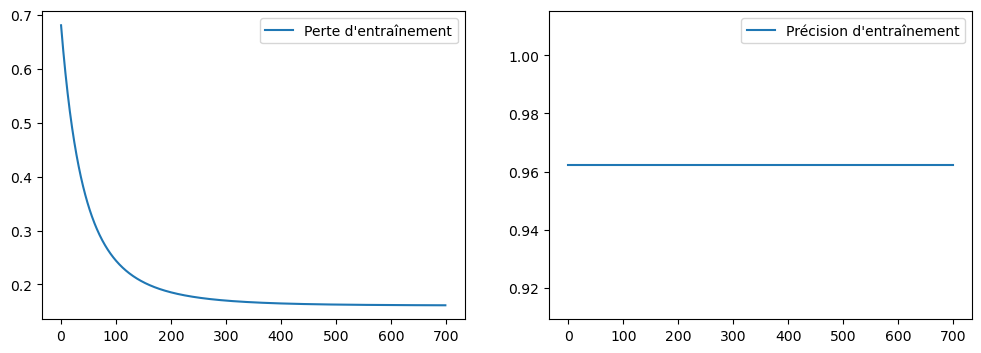

Précision finale: 0.9621714285714286


In [120]:
import numpy as np
from tqdm import tqdm
from sklearn.metrics import accuracy_score, log_loss
import matplotlib.pyplot as plt

class neuroneDAOI:
    def __init__(self, input_size, hidden_layers=(32, 32, 16), output_size=1):
        """Initialisation du modèle"""
        self.dimensions = [input_size] + list(hidden_layers) + [output_size]
        self.parameters = self._initialize_parameters()
        self.training_history = None
    
    def _initialize_parameters(self):
        """Initialisation des paramètres (poids et biais)"""
        parameters = {}
        np.random.seed(1)
        
        for c in range(1, len(self.dimensions)):
            parameters[f'W{c}'] = np.random.randn(self.dimensions[c], self.dimensions[c-1]) * 0.01
            parameters[f'b{c}'] = np.zeros((self.dimensions[c], 1))
            
        return parameters
    
    def forward_propagation(self, X):
        """Propagation avant"""
        activations = {'A0': X}
        C = len(self.parameters) // 2
        
        for c in range(1, C + 1):
            Z = np.dot(self.parameters[f'W{c}'], activations[f'A{c-1}']) + self.parameters[f'b{c}']
            activations[f'A{c}'] = 1 / (1 + np.exp(-np.clip(Z, -700, 700)))  # Sigmoid avec protection contre overflow
            
        return activations
    
    def back_propagation(self, X, y, activations):
        """Rétropropagation du gradient"""
        m = y.shape[1]
        C = len(self.parameters) // 2
        gradients = {}
        
        # Dérivée de la dernière couche
        dZ = activations[f'A{C}'] - y
        
        for c in reversed(range(1, C + 1)):
            gradients[f'dW{c}'] = (1/m) * np.dot(dZ, activations[f'A{c-1}'].T)
            gradients[f'db{c}'] = (1/m) * np.sum(dZ, axis=1, keepdims=True)
            
            if c > 1:
                dZ = np.dot(self.parameters[f'W{c}'].T, dZ) * activations[f'A{c-1}'] * (1 - activations[f'A{c-1}'])
                
        return gradients
    
    def update_parameters(self, gradients, learning_rate):
        """Mise à jour des paramètres"""
        C = len(self.parameters) // 2
        
        for c in range(1, C + 1):
            self.parameters[f'W{c}'] -= learning_rate * gradients[f'dW{c}']
            self.parameters[f'b{c}'] -= learning_rate * gradients[f'db{c}']
    
    def predict(self, X, threshold=0.5):
        """Prédiction"""
        activations = self.forward_propagation(X)
        C = len(self.parameters) // 2
        Af = activations[f'A{C}']
        return (Af >= threshold).astype(int)
    
    def compute_metrics(self, X, y):
        """Calcul des métriques (log loss et accuracy)"""
        activations = self.forward_propagation(X)
        C = len(self.parameters) // 2
        Af = activations[f'A{C}']
        
        loss = log_loss(y.flatten(), Af.flatten())
        accuracy = accuracy_score(y.flatten(), self.predict(X).flatten())
        
        return loss, accuracy
    
    def train(self, X_train, y_train, learning_rate=0.02, n_iter=700):
        """Entraînement du modèle"""
        self.training_history = np.zeros((n_iter, 2))
        
        for i in tqdm(range(n_iter)):
            # Propagation avant
            activations = self.forward_propagation(X_train)
            
            # Rétropropagation
            gradients = self.back_propagation(X_train, y_train, activations)
            
            # Mise à jour des paramètres
            self.update_parameters(gradients, learning_rate)
            
            # Calcul des métriques
            self.training_history[i, 0], self.training_history[i, 1] = self.compute_metrics(X_train, y_train)
        
        # Affichage des courbes d'apprentissage
        self.plot_training_history()
        
        return self.training_history
    
    def plot_training_history(self):
        """Visualisation des courbes d'apprentissage"""
        if self.training_history is None:
            raise ValueError("Le modèle n'a pas encore été entraîné")
            
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(self.training_history[:, 0], label='Perte d\'entraînement')
        plt.legend()
        plt.subplot(1, 2, 2)
        plt.plot(self.training_history[:, 1], label='Précision d\'entraînement')
        plt.legend()
        plt.show()

# Exemple d'utilisation
if __name__ == "__main__":
    
    # Création et entraînement du modèle
    modelBONID = neuroneDAOI(input_size=12, hidden_layers=(8, 8), output_size=1)
    history = modelBONID.train(X_train, y_train, learning_rate=0.02, n_iter=700)
    
    # Prédiction
    predictions = modelBONID.predict(X_train)
    print("Précision finale:", accuracy_score(y_train.flatten(), predictions.flatten()))

In [121]:
modelBONID

In [122]:

    #modDAO = get_trained_model(X_test, y_test)
    predictions = modelBONID.predict(X_test)
    print(" Précision finale:", accuracy_score(y_test.flatten(), predictions.flatten()))

 Précision finale: 0.9618666666666666


In [82]:
#joblib.dump(modDAO, "modeleNEURONE.pkl")  # Enregistre dans un fichier

In [141]:
import joblib
# Sauvegarder le modèle dans un fichier
joblib.dump(modelBONID, 'modelePBBC.pkl')

['modelePBBC.pkl']

In [142]:
# Chargement du modèle
modeleCC = joblib.load("modelePBBC.pkl")

In [136]:
""""" ['Age', 'Risque_du_secteur', 'freq_depots', 'freq_des_retraits', 'Lieux_de_residence',
 'Type_de_client', 'M_depot', 'M_retrait', 'M_recu', 'M_envoye',
 'Z_t_recu', 'Z_t_envoye', 'Blanchiment'] """""


'"" [\'Age\', \'Risque_du_secteur\', \'freq_depots\', \'freq_des_retraits\', \'Lieux_de_residence\',\n \'Type_de_client\', \'M_depot\', \'M_retrait\', \'M_recu\', \'M_envoye\',\n \'Z_t_recu\', \'Z_t_envoye\', \'Blanchiment\'] '

In [137]:
import numpy as np

client_data = np.array([[16, 1, 20,13,0, 1,9000000,9000000,4000000,0,1 ,1]])
client_data = client_data.T

In [143]:
resultat = modeleCC. predict(client_data)
# Pour un DataFrame
#resultat = modele.predict(client_df)
resultat

array([[0]])

**Pour le premier finale**

In [ ]:
import customtkinter as ctk
import numpy as np
import random  # utilisé pour la simulation
import tkinter.messagebox as messagebox

# Initialisation de customtkinter
ctk.set_appearance_mode("System")
ctk.set_default_color_theme("blue")

# Création de la fenêtre principale
root = ctk.CTk()
root.title("Analyse de Risque du Blanchiment de Capitaux d'un client")
root.geometry("600x700")

# Labels des variables
labels = [
    "Âge", "Risque du secteur", "Fréquence des dépôts", "Fréquence des retraits",
    "Lieu de résidence", "Type de client", "Montant des dépôts", "Montant des retraits",
    "Montant reçu", "Montant envoyé", "Zone de transfert reçu", "Zone de transfert envoyé"
]

# Stockage des entrées
entries = {}

# --- En-têtes ---
title_label = ctk.CTkLabel(
    root,
    text="LOGICIEL D'ANALYSE DE RISQUE D'UN CLIENT",
    font=("Arial", 20, "bold")
)
title_label.pack(pady=(10,0))

subtitle_label = ctk.CTkLabel(
    root, text="BLANCHIMENT D'ARGENT", font=("Arial", 14)
)
subtitle_label.pack(pady=(0,10))

# --- Description ---
description_frame = ctk.CTkFrame(root, corner_radius=10)
description_frame.pack(pady=10, fill="x", padx=20)
ctk.CTkLabel(
    description_frame,
    text="Entrez les informations du client pour évaluer son risque :",
    font=("Arial", 12, "italic")
).pack(pady=10)

# --- Champs de saisie ---
data_frame = ctk.CTkFrame(root, corner_radius=10)
data_frame.pack(pady=10, padx=20, fill="both", expand=True)

for lbl in labels:
    row = ctk.CTkFrame(data_frame, corner_radius=10)
    row.pack(pady=5, fill="x", padx=10)
    ctk.CTkLabel(row, text=f"{lbl} :", font=("Arial", 12)).pack(side="left", padx=10)
    var = ctk.StringVar()
    ent = ctk.CTkEntry(row, textvariable=var, font=("Arial", 12), corner_radius=10)
    ent.pack(side="right", fill="x", expand=True, padx=10)
    entries[lbl] = ent

# --- Fonctions d’action ---
def reinitialiser_champs(event=None):
    """Vide tous les champs (raccourci Ctrl+R)."""
    for ent in entries.values():
        ent.delete(0, "end")

def Apprentissage_profond(event=None):
    """Exécute le modèle (raccourci Entrée)."""
    try:
        # Récupération et conversion
        data = [int(entries[l].get()) for l in labels]
        DAO = np.array(data).reshape(-1,1)  # transpose si nécessaire
        
        resultat = modeleCC. predict(DAO)
        # Pour un DataFrame
        #resultat = modele.predict(client_df)
        resultat
        blanchiment = "Oui" if resultat = array([[1]]) else "Non"

        # Fenêtre de résultat
        win = ctk.CTkToplevel(root)
        win.title("Résultats")
        ctk.CTkLabel(
            win,
            text=f"Pourcentage de risque : {F:.2%}\nBlanchiment probable : {blanchiment}",
            font=("Arial", 14)
        ).pack(pady=20, padx=20)
        ctk.CTkButton(win, text="Fermer", command=win.destroy).pack(pady=(0,20))

    except ValueError:
        messagebox.showerror(
            "Erreur",
            "Veuillez entrer des valeurs numériques valides dans tous les champs."
        )

# --- Boutons ---
button_frame = ctk.CTkFrame(root, corner_radius=10)
button_frame.pack(pady=20)

btn_exec = ctk.CTkButton(
    button_frame,
    text="Exécuter le modèle    (Entrée)",
    command= modele,
    width=200
)
btn_exec.pack(side="left", padx=10)

btn_reset = ctk.CTkButton(
    button_frame,
    text="Réinitialiser    (Ctrl+R)",
    command=reinitialiser_champs,
    fg_color="#FF3333", hover_color="#CC0000",
    width=200
)
btn_reset.pack(side="left", padx=10)

btn_close = ctk.CTkButton(
    root,
    text="Fermer    (Échap)",
    command=root.destroy
)
btn_close.pack(pady=(0,20))

# --- Bindings clavier ---
root.bind("<Return>", Apprentissage_profond)
root.bind("<Escape>", lambda e: root.destroy())
root.bind("<Control-r>", reinitialiser_champs)

# --- Lancement de l’application ---
root.mainloop()


In [ ]:
# =======================
# 🔹 IMPORTATIONS
# =======================
import customtkinter as ctk
import numpy as np
import random  # Pour d'éventuelles simulations
import tkinter.messagebox as messagebox

# =======================
# 🔹 CONFIGURATION DE L'INTERFACE
# =======================
ctk.set_appearance_mode("System")
ctk.set_default_color_theme("blue")

# =======================
# 🔹 FENÊTRE PRINCIPALE
# =======================
root = ctk.CTk()
root.title("Analyse de Risque du Blanchiment de Capitaux d'un client")
root.geometry("600x700")

# =======================
# 🔹 LISTE DES VARIABLES À SAISIR
# =======================
labels = [
    "Âge", "Risque du secteur", "Fréquence des dépôts", "Fréquence des retraits",
    "Lieu de résidence", "Type de client", "Montant des dépôts", "Montant des retraits",
    "Montant reçu", "Montant envoyé", "Zone de transfert reçu", "Zone de transfert envoyé"
]
entries = {}  # Dictionnaire pour stocker les champs de saisie

# =======================
# 🔹 TITRES PRINCIPAUX
# =======================
title_label = ctk.CTkLabel(root, text="LOGICIEL D'ANALYSE DE RISQUE D'UN CLIENT", font=("Arial", 20, "bold"))
title_label.pack(pady=(10, 0))

subtitle_label = ctk.CTkLabel(root, text="BLANCHIMENT D'ARGENT", font=("Arial", 14))
subtitle_label.pack(pady=(0, 10))

# =======================
# 🔹 DESCRIPTION
# =======================
description_frame = ctk.CTkFrame(root, corner_radius=10)
description_frame.pack(pady=10, fill="x", padx=20)
ctk.CTkLabel(description_frame, text="Entrez les informations du client pour évaluer son risque :", font=("Arial", 12, "italic")).pack(pady=10)

# =======================
# 🔹 CHAMPS DE SAISIE
# =======================
data_frame = ctk.CTkFrame(root, corner_radius=10)
data_frame.pack(pady=10, padx=20, fill="both", expand=True)

for lbl in labels:
    row = ctk.CTkFrame(data_frame, corner_radius=10)
    row.pack(pady=5, fill="x", padx=10)
    ctk.CTkLabel(row, text=f"{lbl} :", font=("Arial", 12)).pack(side="left", padx=10)
    var = ctk.StringVar()
    ent = ctk.CTkEntry(row, textvariable=var, font=("Arial", 12), corner_radius=10)
    ent.pack(side="right", fill="x", expand=True, padx=10)
    entries[lbl] = ent

# =======================
# 🔹 FONCTIONS UTILITAIRES
# =======================
def reinitialiser_champs(event=None):
    """Vide tous les champs de saisie."""
    for ent in entries.values():
        ent.delete(0, "end")

def Apprentissage_profond(event=None):
    """Applique le modèle et affiche le résultat."""
    try:
        # Récupération des données
        data = [float(entries[l].get()) for l in labels]  # conversion en float
        DAO = np.array(data).reshape(1, -1)  # 1 ligne, n colonnes
        
        # Prédiction avec le modèle chargé (à définir avant dans votre script)
        resultat = modeleCC.predict(DAO)
        proba = modeleCC.predict_proba(DAO)[0][1]  # Probabilité que ce soit 1
        
        blanchiment = "Oui" if resultat[0] == 1 else "Non"

        # Fenêtre de résultat
        win = ctk.CTkToplevel(root)
        win.title("Résultats")
        ctk.CTkLabel(
            win,
            text=f"Probabilité de risque : {proba:.2%}\nBlanchiment probable : {blanchiment}",
            font=("Arial", 14)
        ).pack(pady=20, padx=20)
        ctk.CTkButton(win, text="Fermer", command=win.destroy).pack(pady=(0, 20))

    except ValueError:
        messagebox.showerror(
            "Erreur",
            "Veuillez entrer des valeurs numériques valides dans tous les champs."
        )

# =======================
# 🔹 BOUTONS D’ACTION
# =======================
button_frame = ctk.CTkFrame(root, corner_radius=10)
button_frame.pack(pady=20)

btn_exec = ctk.CTkButton(
    button_frame,
    text="Exécuter le modèle    (Entrée)",
    command=Apprentissage_profond,
    width=200
)
btn_exec.pack(side="left", padx=10)

btn_reset = ctk.CTkButton(
    button_frame,
    text="Réinitialiser    (Ctrl+R)",
    command=reinitialiser_champs,
    fg_color="#FF3333",
    hover_color="#CC0000",
    width=200
)
btn_reset.pack(side="left", padx=10)

btn_close = ctk.CTkButton(
    root,
    text="Fermer    (Échap)",
    command=root.destroy
)
btn_close.pack(pady=(0, 20))

# =======================
# 🔹 RACCOURCIS CLAVIER
# =======================
root.bind("<Return>", Apprentissage_profond)
root.bind("<Escape>", lambda e: root.destroy())
root.bind("<Control-r>", reinitialiser_champs)

# =======================
# 🔹 LANCEMENT DE L’APPLICATION
# =======================
root.mainloop()

**Transformationn en un modèle**

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import accuracy_score, log_loss

def initialisation(dimensions):
    parametres = {}
    C = len(dimensions) - 1  
    for c in range(1, C + 1):
        parametres['W' + str(c)] = np.random.randn(dimensions[c], dimensions[c-1]) * 0.01
        parametres['b' + str(c)] = np.zeros((dimensions[c], 1))
    return parametres

def sigmoid(Z):
    Z = np.clip(Z, -700, 700)
    return 1 / (1 + np.exp(-Z))

def sigmoid_derivative(A):
    return A * (1 - A)

def forward_propagation(X, parametres):
    activations = {'A0': X.T}
    C = len(parametres) // 2
    for c in range(1, C + 1):
        W = parametres['W' + str(c)]
        b = parametres['b' + str(c)]
        A_prev = activations['A' + str(c-1)]
        Z = np.dot(W, A_prev) + b
        A = sigmoid(Z)
        activations['Z' + str(c)] = Z
        activations['A' + str(c)] = A
    return activations

def back_propagation(y, parametres, activations):
    gradients = {}
    m = y.shape[0]
    y = y.reshape(activations['A' + str(len(parametres)//2)].T.shape)
    
    C = len(parametres) // 2
    dA = activations['A' + str(C)] - y.T  
    for c in reversed(range(1, C + 1)):
        A_prev = activations['A' + str(c-1)]
        Z = activations['Z' + str(c)]
        A = activations['A' + str(c)]
        dZ = dA * sigmoid_derivative(A)
        dW = (1/m) * np.dot(dZ, A_prev.T)
        db = (1/m) * np.sum(dZ, axis=1, keepdims=True)
        gradients["dW" + str(c)] = dW
        gradients["db" + str(c)] = db
        if c > 1:
            W = parametres['W' + str(c)]
            dA = np.dot(W.T, dZ)
    return gradients

def update(gradients, parametres, learning_rate):
    C = len(parametres) // 2
    for c in range(1, C + 1):
        parametres['W' + str(c)] -= learning_rate * gradients['dW' + str(c)]
        parametres['b' + str(c)] -= learning_rate * gradients['db' + str(c)]
    return parametres

def predict(self, X):
    # Si les données sont au format (n_samples, n_features), on les transpose
    if X.shape[0] > X.shape[1]:
        X = X.T  # devient (n_features, n_samples)

    y_pred = predict(X, self.parametres)  # résultat: (1, n_samples) ou (1, N)
    
    # On retourne la sortie sous forme (n_samples, 1)
    return y_pred.T  

class ApprentissageProfondModel:
    def __init__(self, parametres):
        self.parametres = parametres

    def predict(self, X):
        if X.shape[0] > X.shape[1]:  # si les données sont sous forme (n_samples, n_features)
            X = X.T  # on transpose pour correspondre au modèle
        y_pred = predict(X, self.parametres)
        return y_pred.T 

    def score(self, X, y):
        y_pred = self.predict(X)
        return accuracy_score(y.flatten(), y_pred.flatten())

def Apprentissage_profond_DAO(X_train, y_train, hidden_layers=(32, 32, 16), learning_rate=0.02, n_iter=1000):
    # initialisation paramètres
    dimensions = list(hidden_layers)
    dimensions.insert(0, X_train.shape[1])  
    dimensions.append(y_train.shape[1] if len(y_train.shape) > 1 else 1) 

    np.random.seed(1)
    parametres = initialisation(dimensions)
    
    training_history = np.zeros((int(n_iter), 2))

    C = len(parametres) // 2

    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X_train, parametres)
        gradients = back_propagation(y_train, parametres, activations)
        parametres = update(gradients, parametres, learning_rate)
        Af = activations['A' + str(C)]

        training_history[i, 0] = log_loss(y_train.flatten(), Af.flatten())
        y_pred = predict(X_train, parametres)
        training_history[i, 1] = accuracy_score(y_train.flatten(), y_pred.flatten())

   
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(training_history[:, 0], label="Perte")
    plt.title("Courbe de perte")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(training_history[:, 1], label="Précision")
    plt.title("Courbe de précision")
    plt.legend()
    plt.show()
    return ApprentissageProfondModel(parametres)


In [120]:
modDAO = ApprentissageProfondModel(parametres)

In [121]:
modDAO

In [125]:
modDAO.predict(X_test.T)
modDAO.score(X_test.T, y_test.T)

AttributeError: 'dict' object has no attribute 'shape'

**L'entrainement du Modèle**

In [215]:
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense

#def Apprentissage_profond_DAO(X_train, y_train):
#    modDAO = Sequential()
#    modDAO.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
#    modDAO.add(Dense(1, activation='sigmoid'))
    
#    modDAO.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
#    return model  # <-- tu dois retourner le modèle, pas l'entrainer ici

**Tester le modèle**

**Déploiyement avec mlflow**

**https://moncoachdata.com/blog/comment-deployer-des-modeles-de-machine-learning-comme-un-pro/**

**Étape 2 : Sauvegarder le modèle entraîné**

In [118]:
!pip install joblib

In [364]:
import joblib
# Sauvegarder le modèle dans un fichier
#joblib.dump(modDAO, 'modDAO.pkl')

**Étape 3 : Choisir une stratégie de déploiement**

Il existe plusieurs façons de déployer un modèle de Machine Learning en production, en fonction de ton cas d’utilisation et de ton infrastructure.

**Voici quelques stratégies courantes :**

**Déploiement basé sur l’API REST**
Le déploiement de ton modèle en tant qu’API REST permet à d’autres applications ou systèmes d’envoyer des requêtes HTTP à ton modèle et d’obtenir des prédictions en retour. Cela est utile pour les applications web, les applications mobiles et d’autres systèmes en ligne.

**Traitement par lots**
Dans le traitement par lots, le modèle est exécuté périodiquement sur de grands ensembles de données (par exemple, tous les jours ou toutes les semaines) et produit des prédictions qui sont stockées pour une utilisation ultérieure. Ce type de traitement est courant dans des secteurs tels que la finance et la santé, où les décisions n’ont pas besoin d’être prises en temps réel.

**Données en continu**
Pour les prédictions en temps réel sur des données arrivant en continu, les modèles peuvent être déployés dans le cadre d’un pipeline de données en continu à l’aide d’outils tels qu’Apache Kafka ou Flink.

**Étape 4 : Déployer le modèle en tant qu’API REST**

L’approche la plus courante consiste à servir ton modèle en tant qu’API REST à l’aide d’un framework web léger tel que Flask ou FastAPI.

**Exemple : Déploiement avec Flask**

**Créer une application Flask**
Crée d’abord un fichier Python (app.py) pour définir l’API et charger le modèle entraîné.

In [127]:
from flask import Flask, request, jsonify
import joblib

model = joblib.load('modelecharge.pkl')
app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json() 
    prediction = model.predict([data['features']])
    return jsonify({'prediction': int(prediction[0])})
if __name__ == '__main__':
    app.run(debug=True)

FileNotFoundError: [Errno 2] No such file or directory: 'modelecharge.pkl'

**Exécuter l’application Flask**
Pour exécuter l’application Flask localement :

In [ ]:
python app.py

Tu peux maintenant envoyer des requêtes au point de terminaison de ton modèle à l’adresse http://localhost:5000/predict et obtenir des prédictions.

Exemple : Envoi d’une requête POST pour une prédiction

Pour obtenir des prédictions, tu peux envoyer une requête POST avec des features au format JSON :

In [ ]:
curl -X POST http://localhost:5000/predict -H "Content-Type: application/json" -d '{"features": [5.1, 3.5, 1.4, 0.2]}'

**Étape 5 : Conteneuriser l’application avec Docker**

Les conteneurs sont un moyen populaire de déployer des modèles de Machine Learning, car ils assurent la cohérence entre les différents environnements (local, staging, production).

Étapes de la mise en place d’un modèle Docker :

Installer Docker : Assure-toi que Docker est installé sur ta machine.
Créer un fichier Docker : Ce fichier définit l’environnement dans lequel ton modèle s’exécutera.
**Voici un exemple de fichier Docker simple :**

In [ ]:
# Utiliser un runtime Python officiel comme image mère
!FROM python:3.9-slim
# Définir le répertoire de travail
!WORKDIR /app
# Copier le contenu du répertoire actuel dans le conteneur à /app
!COPY . /app
# Installer les paquets nécessaires
!RUN pip install -r requirements.txt
# Rendre le port 5000 accessible au monde extérieur à ce conteneur
!EXPOSE 5000
# Exécuter app.py au lancement du conteneur
!CMD ["python", "app.py"]

Construire l’image Docker :

In [ ]:
!docker build -t ml-model-api 

In [ ]:
!Exécuter le conteneur Docker :

In [ ]:
!docker run -p 5000:5000 ml-model-api

Ton modèle s’exécute maintenant dans un conteneur Docker et est accessible depuis n’importe quel environnement prenant en charge Docker.

**Étape 6 : Déployer vers une plateforme Cloud**

Une fois ton modèle conteneurisé, l’étape suivante consiste à le déployer dans le cloud. Il existe plusieurs plateformes cloud pour déployer des modèles de Machine Learning, telles que

AWS : Utilise AWS Elastic Beanstalk, AWS Lambda ou SageMaker.
Google Cloud : Déployer sur Google Cloud Run ou AI Platform.
Microsoft Azure : Utilise Azure ML ou App Service.
Par exemple, pour déployer ton modèle conteneurisé sur AWS Elastic Beanstalk :

Installer le CLI EB : le CLI AWS Elastic Beanstalk t’aide à créer et à gérer ton application.

In [ ]:
!pip install awsebcli

Initialiser l’environnement EB:

In [ ]:
!eb init

Déployer l’application :

In [ ]:
!eb create ml-api-env

Accéder à l’application : Une fois l’application déployée, AWS fournira une URL où l’API de votre modèle sera hébergée.

**Étape 7 : Contrôler et mettre à jour le modèle**

Le déploiement n’est pas la fin du périple. Après le déploiement, tu dois surveiller ou monitorer les performances du modèle, gérer les problèmes de mise à l’échelle et mettre périodiquement le modèle à jour lorsque de nouvelles données sont disponibles.

**Monitoring :** Utilise des outils de surveillance pour suivre les performances de ton modèle en production. Tu peux surveiller des paramètres tels que la latence, le taux d’erreur et la dérive de la précision au fil du temps.
**Mise à l’échelle (scaling) :** Si l’application doit gérer un grand nombre de demandes, des outils de mise à l’échelle automatique comme Kubernetes ou AWS Auto Scaling peuvent aider à gérer la charge.
**Versioning :** Maintiens le contrôle des versions de tes modèles. Des outils comme MLflow et DVC (Data Version Control) peuvent aider à suivre les différentes versions de tes modèles, ce qui facilite le retour à une version antérieure si nécessaire.

Le déploiement de modèles de Machine Learning à partir de Jupyter Notebooks vers la production ne se limite pas à l’écriture de code : il s’agit de s’assurer que ton modèle est robuste, évolutif et accessible.

En sauvegardant le modèle, en le servant via une API, en le conteneurisant avec Docker et en le déployant sur le cloud, tu peux passer de l’expérimentation à une solution prête pour la production.

Avec une surveillance et une maintenance appropriées, ton modèle de Machine Learning peut apporter une valeur réelle aux utilisateurs dans des environnements réels.

**HMM**

In [124]:
!pip install hmmlearn

In [21]:
import numpy as np
from hmmlearn import hmm
from sklearn.preprocessing import StandardScaler

# Normaliser les données si nécessaire
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialisation du modèle HMM 5 états cachés)
model = hmm.GaussianHMM(n_components=3, covariance_type="diag", n_iter=1000)

# Entraîner le modèle avec X_train
model.fit(X_train)

# Faire des prédictions sur X_test
predictions = model.predict(X_test)

# Afficher les prédictions et la performance
print("Prédictions sur X_test:", predictions)
print("Étiquettes réelles sur X_test:", y_test)

# Si vous souhaitez évaluer la précision :
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")


Prédictions sur X_test: [0 2 2 ... 0 0 2]
Étiquettes réelles sur X_test: 35363    0
43649    0
60832    0
37399    0
61034    0
        ..
87507    0
22905    0
17212    0
7986     0
46435    0
Name: Blanchiment, Length: 30000, dtype: int64
Accuracy: 0.4791


**REGRESSION LOGISTIQUE**

In [19]:
##la regression logistique
# Régression logistique
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Évaluation de la régression logistique
log_predictions = log_reg.predict(X_test)
log_accuracy = accuracy_score(y_test, log_predictions)
print(f"Précision de la régression logistique: {log_accuracy:.4f}")

Précision de la régression logistique: 0.9570


C:\Users\issad\Anaconda3.13\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [156]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Modèle de régression logistique
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Prédictions
"""y_pred = model.predict(X_test)
proba = model.predict_proba(X_test)

# Affichage des résultats
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy du modèle : {accuracy*100:.2f}%")

# Affichage des probabilités pour chaque client
for i, p in enumerate(proba):
    print(f"Client {i+1} - Probabilité de risque : {p[1]*100:.2f} % (0 = non suspect, 1 = suspect)")


SyntaxError: incomplete input (1706837764.py, line 12)

In [106]:
!pip install customtkinter

In [108]:
import tkinter
import customtkinter
print(tkinter.TkVersion)


8.6


In [109]:
import tkinter as tk


**L'interface bon de dao issa**

In [2]:
import customtkinter as ctk
import numpy as np
import random  # utilisé pour la simulation
import tkinter.messagebox as messagebox

# Initialisation de customtkinter
ctk.set_appearance_mode("System")
ctk.set_default_color_theme("blue")

# Création de la fenêtre principale
root = ctk.CTk()
root.title("Analyse de Risque du Blanchiment de Capitaux d'un client")
root.geometry("600x700")

# Labels des variables
labels = [
    "Âge", "Risque du secteur", "Fréquence des dépôts", "Fréquence des retraits",
    "Lieu de résidence", "Type de client", "Montant des dépôts", "Montant des retraits",
    "Montant reçu", "Montant envoyé", "Zone de transfert reçu", "Zone de transfert envoyé"
]

# Stockage des entrées
entries = {}

# --- En-têtes ---
title_label = ctk.CTkLabel(
    root,
    text="LOGICIEL D'ANALYSE DE RISQUE D'UN CLIENT OU DES CLIENTS DE LA BANQUE",
    font=("Arial", 20, "bold")
)
title_label.pack(pady=(10,0))

subtitle_label = ctk.CTkLabel(
    root, text="BLANCHIMENT D'ARGENT", font=("Arial", 14)
)
subtitle_label.pack(pady=(0,10))

# --- Description ---
description_frame = ctk.CTkFrame(root, corner_radius=10)
description_frame.pack(pady=10, fill="x", padx=20)
ctk.CTkLabel(
    description_frame,
    text="Entrez les informations du client pour évaluer son risque :",
    font=("Arial", 12, "italic")
).pack(pady=10)

# --- Champs de saisie ---
data_frame = ctk.CTkFrame(root, corner_radius=10)
data_frame.pack(pady=10, padx=20, fill="both", expand=True)

for lbl in labels:
    row = ctk.CTkFrame(data_frame, corner_radius=10)
    row.pack(pady=5, fill="x", padx=10)
    ctk.CTkLabel(row, text=f"{lbl} :", font=("Arial", 12)).pack(side="left", padx=10)
    var = ctk.StringVar()
    ent = ctk.CTkEntry(row, textvariable=var, font=("Arial", 12), corner_radius=10)
    ent.pack(side="right", fill="x", expand=True, padx=10)
    entries[lbl] = ent

# --- Fonctions d’action ---
def reinitialiser_champs(event=None):
    """Vide tous les champs (raccourci Ctrl+R)."""
    for ent in entries.values():
        ent.delete(0, "end")

def Apprentissage_profond(event=None):
    """Exécute le modèle (raccourci Entrée)."""
    try:
        # Récupération et conversion
        data = [int(entries[l].get()) for l in labels]
        DAO = np.array(data).reshape(-1,1)  # transpose si nécessaire

        # Simulation de sortie de modèle
        F = random.random()
        blanchiment = "Oui" if F > 0.6 else "Non"

        # Fenêtre de résultat
        win = ctk.CTkToplevel(root)
        win.title("Résultats")
        ctk.CTkLabel(
            win,
            text=f"Pourcentage de risque : {F:.2%}\nBlanchiment probable : {blanchiment}",
            font=("Arial", 14)
        ).pack(pady=20, padx=20)
        ctk.CTkButton(win, text="Fermer", command=win.destroy).pack(pady=(0,20))

    except ValueError:
        messagebox.showerror(
            "Erreur",
            "Veuillez entrer des valeurs numériques valides dans tous les champs."
        )

# --- Boutons ---
button_frame = ctk.CTkFrame(root, corner_radius=10)
button_frame.pack(pady=20)

btn_exec = ctk.CTkButton(
    button_frame,
    text="Exécuter le modèle    (Entrée)",
    command=Apprentissage_profond,
    width=200
)
btn_exec.pack(side="left", padx=10)

btn_reset = ctk.CTkButton(
    button_frame,
    text="Réinitialiser    (Ctrl+R)",
    command=reinitialiser_champs,
    fg_color="#FF3333", hover_color="#CC0000",
    width=200
)
btn_reset.pack(side="left", padx=10)

btn_close = ctk.CTkButton(
    root,
    text="Fermer    (Échap)",
    command=root.destroy
)
btn_close.pack(pady=(0,20))

# --- Bindings clavier ---
root.bind("<Return>", Apprentissage_profond)
root.bind("<Escape>", lambda e: root.destroy())
root.bind("<Control-r>", reinitialiser_champs)

# --- Lancement de l’application ---
root.mainloop()



**Mon teste 07/07/2025**

***Mise en œuvre avec SHAP :***

In [243]:
!pip install shap
!pip install lime
!pip uninstall torch torchvision torchaudio


   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---

In [245]:
import shap

# Convertir X_train et X_test en tableaux numpy si ce n’est pas déjà fait
X_train_array = X_train if isinstance(X_train, np.ndarray) else X_train.to_numpy()
X_test_array = X_test if isinstance(X_test, np.ndarray) else X_test.to_numpy()

# Créer un explainer SHAP compatible avec tout modèle
explainer = shap.KernelExplainer(modDAO.predict, X_train_array)

# Calcul des valeurs SHAP sur X_test
shap_values = explainer.shap_values(X_test_array)

# Visualisation
shap.summary_plot(shap_values, X_test_array)

Provided model function fails when applied to the provided data set.


ValueError: shapes (12,12) and (70000,12) not aligned: 12 (dim 1) != 70000 (dim 0)

In [57]:
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(X_train,
                                                   feature_names=feature_names,
                                                   class_names=['Non blanchiment', 'Blanchiment'],
                                                   mode='classification')

# Explication pour une instance spécifique
exp = explainer.explain_instance(X_test.iloc[0].values, ISSA.predict_proba, num_features=10)
exp.show_in_notebook(show_table=True)

NameError: name 'feature_names' is not defined

In [157]:
import customtkinter as ctk
import numpy as np
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm
import matplotlib.pyplot as plt


class DeepNeuralNetwork:
    def __init__(self, input_size, hidden_layers=(32, 32, 16), output_size=1):
        """Initialisation du modèle"""
        self.dimensions = [input_size] + list(hidden_layers) + [output_size]
        self.parameters = self._initialize_parameters()
        self.training_history = None
    
    def _initialize_parameters(self):
        """Initialisation des paramètres"""
        parameters = {}
        np.random.seed(1)
        
        for c in range(1, len(self.dimensions)):
            parameters[f'W{c}'] = np.random.randn(self.dimensions[c], self.dimensions[c-1]) * 0.01
            parameters[f'b{c}'] = np.zeros((self.dimensions[c], 1))
            
        return parameters
    
    def forward_propagation(self, X):
        """Propagation avant"""
        activations = {'A0': X}
        C = len(self.parameters) // 2
        
        for c in range(1, C + 1):
            Z = np.dot(self.parameters[f'W{c}'], activations[f'A{c-1}']) + self.parameters[f'b{c}']
            activations[f'A{c}'] = 1 / (1 + np.exp(-np.clip(Z, -700, 700)))
            
        return activations
    
    def predict(self, X, threshold=0.5):
        """Prédiction"""
        activations = self.forward_propagation(X)
        C = len(self.parameters) // 2
        Af = activations[f'A{C}']
        return (Af >= threshold).astype(int)
    
    def train(self, X_train, y_train, learning_rate=0.02, n_iter=1000):
        """Entraînement du modèle"""
        self.training_history = np.zeros((n_iter, 2))
        C = len(self.parameters) // 2
        
        for i in tqdm(range(n_iter)):
            # Propagation avant
            activations = self.forward_propagation(X_train)
            Af = activations[f'A{C}']
            
            # Retropropagation (version simplifiée)
            m = y_train.shape[1]
            dZ = Af - y_train
            gradients = {}
            
            for c in reversed(range(1, C + 1)):
                gradients[f'dW{c}'] = (1/m) * np.dot(dZ, activations[f'A{c-1}'].T)
                gradients[f'db{c}'] = (1/m) * np.sum(dZ, axis=1, keepdims=True)
                
                if c > 1:
                    dZ = np.dot(self.parameters[f'W{c}'].T, dZ) * activations[f'A{c-1}'] * (1 - activations[f'A{c-1}'])
            
            # Mise à jour des paramètres
            for c in range(1, C + 1):
                self.parameters[f'W{c}'] -= learning_rate * gradients[f'dW{c}']
                self.parameters[f'b{c}'] -= learning_rate * gradients[f'db{c}']
            
            # Calcul des métriques
            self.training_history[i, 0] = log_loss(y_train.flatten(), Af.flatten())
            y_pred = self.predict(X_train)
            self.training_history[i, 1] = accuracy_score(y_train.flatten(), y_pred.flatten())
        
        return self.training_history


class RiskAnalysisApp:
    def __init__(self, root):
        self.root = root
        self.model = None
        self.setup_ui()
        self.load_model()
    
    def setup_ui(self):
        """Configuration de l'interface"""
        self.root.title("Analyse de Risque de Blanchiment")
        self.root.geometry("600x700")
        
        # [Le reste de votre code d'interface graphique...]
        # ... (conservez votre code existant pour les labels, entries, etc.)
        
        # Ajoutez ce bouton pour tester le modèle
        test_button = ctk.CTkButton(self.root, 
                                  text="Tester le modèle", 
                                  command=self.test_model)
        test_button.pack(pady=10)
    
    def load_model(self):
        
        input_size = 12  
        self.modDAO = DeepNeuralNetwork(input_size=input_size, 
                                     hidden_layers=(12, 12), 
                                     output_size=1)
        
        # Entraînement (à remplacer par votre vrai entraînement)
        print("Entraînement du modèle...")
        self.modDAO.train(X_train, y_train, n_iter=500)
        print("Modèle entraîné!")
    
    def test_model(self):
        """Teste le modèle et affiche la précision"""
        if self.model is None:
            print("Modèle non chargé!")
            return
        
        # Prédiction et calcul de la précision
        predictions = self.modDAO.predict(X_test)
        acc = accuracy_score(y_test.flatten(), predictions.flatten())
        
        # Affichage dans une fenêtre popup
        result_window = ctk.CTkToplevel(self.root)
        result_window.title("Résultats du test")
        ctk.CTkLabel(result_window, 
                    text=f"Précision du modèle: {acc:.2%}", 
                    font=("Arial", 14)).pack(pady=20)
        ctk.CTkButton(result_window, 
                     text="Fermer", 
                     command=result_window.destroy).pack(pady=10)
    if __name__ == "__main__":
        root = ctk.CTk()
        app = RiskAnalysisApp(root)
        root.mainloop()

NameError: name 'RiskAnalysisApp' is not defined